In [1]:
import math
from random import seed
from random import randint
import numpy as np
from matplotlib import pyplot as plot

1. Generate 2D points with a multivariate Gaussian distribution

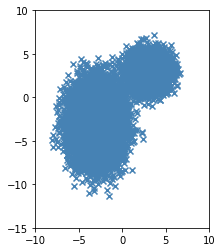

In [2]:
# Generate 2 distributions with following parameters
seed(2)
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]

setRnd1 = np.random.multivariate_normal(mean1, cov1, 10000)
setRnd2 = np.random.multivariate_normal(mean2, cov2, 10000)
setRnd = np.concatenate((setRnd1, setRnd2))

x1, y1 = setRnd1.T
x2, y2 = setRnd2.T
plot.xlim(-10, 10)
plot.ylim(-15, 10)
plot.gca().set_aspect('equal', adjustable='box')
plot.scatter(x1,y1,marker="x",color="steelblue")
plot.scatter(x2,y2,marker="x",color="steelblue")
plot.show()

In [3]:
# helper functions
def getDistance(a1,a2):
    return math.sqrt(((a1[0]-a2[0])**2)+((a1[1]-a2[1])**2))

# return new list
def sumVectors(v1,v2):
    return [v1[0] - v2[0], v1[1] - v2[1]]

def mulVectorByNumber(v, n):
    return [v[0]*n, v[1]*n]

def divVectorByNumber(v, n):
    return [v[0]/n, v[1]/n]

2. Start by choosing two random points in the dataset r1 and r2 and apply the following adaptation
rule:

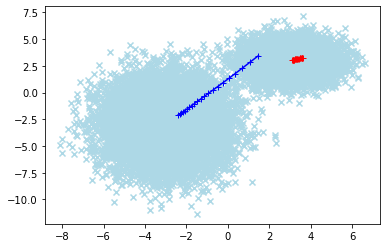

In [4]:
seed(2)

# initialise variables
r1 = setRnd[randint(0, len(setRnd) - 1)].tolist().copy()
r2 = setRnd[randint(0, len(setRnd) - 1)].tolist().copy()
pathr1 = []
pathr2 = []
pathr2.append(r2[:])
pathr1.append(r1[:])

# optimal alpha
alpha = 0.00001

repeats = 20

# calculations
for _ in range(repeats):
    for point in setRnd:
        if (getDistance(r1, point) < getDistance(r2, point)):
            r1[0] = (1 - alpha) * r1[0] + alpha * point[0]
            r1[1] = (1 - alpha) * r1[1] + alpha * point[1]
        else:
            r2[0] = (1 - alpha) * r2[0] + alpha * point[0]
            r2[1] = (1 - alpha) * r2[1] + alpha * point[1]
    
    # save adjusted r1 & r2 for visualisation
    pathr1.append(r1[:])
    pathr2.append(r2[:])

# result visualisation
xr1, yr1 = np.array(pathr1).T

plot.scatter(x1,y1,marker="x",color="lightblue")
plot.plot(xr1,yr1,marker="+",color="b")

xr2, yr2 = np.array(pathr2).T

plot.scatter(x2,y2,marker="x",color="lightblue")
plot.plot(xr2,yr2,marker="+",color="r")
plot.show()

The above example has been chosen as an illustrative example from many tried and tested options.
Based on this graph, we can argue that there is a relationship between the initial and final values of r1 and r2. When choosing r which belongs to the desired cluster, the process reaches a final value closer to the center.

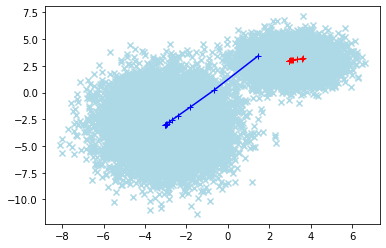

In [5]:
seed(2)

# initialise variables
r1 = setRnd[randint(0, len(setRnd) - 1)].tolist().copy()
r2 = setRnd[randint(0, len(setRnd) - 1)].tolist().copy()
pathr1 = []
pathr2 = []
pathr2.append(r2[:])
pathr1.append(r1[:])

# proportional feedback multiplier
alpha = 0.99

repeats = 10

# calculations
for _ in range(repeats):
    
    # cumulative difference vector for r1 & r2 respectively
    d1 = [0,0]
    d2 = [0,0]
    for point in setRnd:
        if (getDistance(r1, point) < getDistance(r2, point)):
            d1[0] += r1[0] - point[0]
            d1[1] += r1[1] - point[1]
        else:
            d2[0] += r2[0] - point[0]
            d2[1] += r2[1] - point[1]
    
    # adjust r1 & r2 with cumulative difference vector divided by point's number & multiplied by alpha
    r1 = sumVectors(r1, mulVectorByNumber(divVectorByNumber(d1, len(setRnd)), alpha))
    r2 = sumVectors(r2, mulVectorByNumber(divVectorByNumber(d2, len(setRnd)), alpha))
    
    # save adjusted r1 & r2 for visualisation
    pathr1.append(r1[:])
    pathr2.append(r2[:])

# result visualisation
xr1, yr1 = np.array(pathr1).T

plot.scatter(x1,y1,marker="x",color="lightblue")
plot.plot(xr1,yr1,marker="+",color="b")

xr2, yr2 = np.array(pathr2).T

plot.scatter(x2,y2,marker="x",color="lightblue")
plot.plot(xr2,yr2,marker="+",color="r")
plot.show()

Using a differential approach.
Comparing with the previous case, we observe a faster convergence of the result. The process is now less dependent on the choice of initial values r1 and r2. It should also be noted that the alpha coefficient has a different meaning than in the previous case. Here it plays the role of a proportional feedback multiplier with an optimal value close to 1.

3. Plot with one colour the points closest to r1 and with another the points closest to r2.

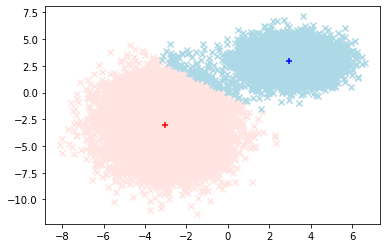

In [6]:
# 

def separator():
    arrR1=[]
    arrR2=[]
    for point in setRnd:
        if (getDistance(r1, point) < getDistance(r2, point)):
            arrR1.append(point)
        else:
            arrR2.append(point)
    return [arrR1, arrR2]

separatedArr = separator()

# result visualisation
xr1, yr1 = np.array(separatedArr[0]).T
xPointr1, yPointr1 = np.array(r1).T

plot.scatter(xr1,yr1,marker="x",color="mistyrose")
plot.scatter(xPointr1,yPointr1,marker="+",color="r")

xr2, yr2 = np.array(separatedArr[1]).T
xPointr2, yPointr2 = np.array(r2).T

plot.scatter(xr2,yr2,marker="x",color="lightblue")
plot.scatter(xPointr2,yPointr2,marker="+",color="b")
plot.show()

The cluster boundary is in the middle between r1 and r2. Visually, some of the points that belong to the left cluster fell into the right cluster. The method of separation according to the principle of least distance does not take into account the peculiarities of the spatial configuration of clusters, although it gives an acceptable result for finding the centers r1 and r2.